In [23]:
import pandas as pd
from matplotlib import pyplot as plot
import seaborn as sns
df = pd.read_csv("./data/requests.csv")
df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,75%,80%,90%,95%,98%,99%,99.9%,99.99%,99.999%,100%
0,GET,/function/nodeinfo,262,0,19,34.713195,10.091066,537.893772,100.809160,0.354089,...,26,28,42,82,280,420,540,540,540,540
1,GET,/function/nodeinfo?policy=test,225,0,19,30.617682,9.158850,561.810970,106.786667,0.304084,...,25,27,41,67,92,520,560,560,560,560
2,NaN,Aggregated,487,0,19,32.821018,9.158850,561.810970,103.570842,0.658174,...,26,28,42,74,210,520,560,560,560,560


In [52]:
df.iloc[:, 7:]

,Max Response Time,Average Content Size,Requests/s,Failures/s,50%,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,99.999%,100%
0,537.893772,100.809160,0.354089,0.0,19,23,26,28,42,82,280,420,540,540,540,540
1,561.810970,106.786667,0.304084,0.0,19,22,25,27,41,67,92,520,560,560,560,560
2,561.810970,103.570842,0.658174,0.0,19,23,26,28,42,74,210,520,560,560,560,560


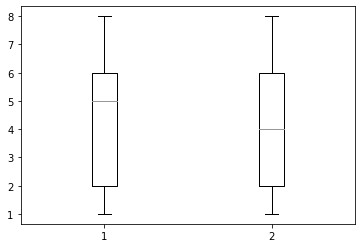

In [34]:
stats = [
    {'med': 5, 'q1': 2, 'q3': 6, 'whislo': 1, 'whishi': 8},
    {'med': 4, 'q1': 2, 'q3': 6, 'whislo': 1, 'whishi': 8}
]

_, ax = plot.subplots();
ax.bxp(stats, showfliers=False);

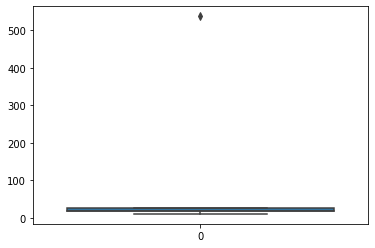

In [60]:


sns.boxplot(data=[df['Min Response Time'][0], df['50%'][0], df['Median Response Time'][0], df['75%'][0], df['Max Response Time'][0]])

plot.show()

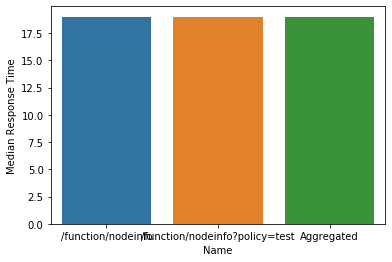

In [59]:
sns.barplot(y=df['Median Response Time'], x=df['Name'])